In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

In [3]:
#Data Prepration
import re

In [4]:
file=open("dl_assig5_pa1.txt",'r')
sentences=(file.read())

In [5]:
print(sentences)

Deep learning is a machine learning technique that teaches computers to do what comes naturally to 
humans: learn by example. Deep learning is a key technology behind driverless cars, enabling them
 to recognize a stop sign, or to distinguish a pedestrian from a lamppost. It is the key to voice control in 
consumer devices like phones, tablets, TVs, and hands-free speakers. 
Deep learning is getting lots of attention lately and for good reason. Itâ€™s achieving results that
 were not possible before.In deep learning, a computer model learns to perform classification 
tasks directly from images, text, or sound. Deep learning models can achieve state-of-the-art 
accuracy, sometimes exceeding human-level performance. Models are trained by 
using a large set of labeled data and neural network architectures that contain many 
layers.In a word, accuracy. Deep learning achieves recognition accuracy at higher levels than 
ever before. This helps consumer electronics meet user expectations, and

In [36]:
sentences = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

Clean Data

In [6]:
# remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# lower all characters
sentences = sentences.lower()

Vocabulary

In [7]:
words = sentences.split()

vocab = set(words)
print(vocab)

{'key', 'can', 'attention', 'perform', 'have', 'voice', 'example', 'learn', 'applications', 'text', 'recognition', 'at', 'art', 'network', 'contain', 'models', 'driverless', 'objects', 'like', 'achieves', 'helps', 'hands', 'word', 'exceeding', 'images', 'using', 'consumer', 'lately', 'tablets', 'learns', 'before', 'labeled', 'the', 'by', 'naturally', 'model', 'lamppost', 'of', 'lots', 'reason', 'crucial', 'free', 'is', 'stop', 'meet', 'that', 'achieving', 'to', 'control', 'from', 'higher', 'architectures', 'many', 'and', 'some', 'them', 'safety', 'directly', 'pedestrian', 'improved', 'performance', 'data', 'it', 'sign', 'machine', 'expectations', 'sometimes', 'outperforms', 'tvs', 'deep', 'technique', 'than', 'do', 'where', 'computer', 'not', 'human', 'teaches', 'enabling', 'tasks', 'distinguish', 'devices', 'in', 'learning', 'large', 'levels', 'state', 'phones', 'recent', 'humans', 'what', 'sound', 'for', 'ever', 'this', 'classifying', 'recognize', 'possible', 'set', 'advances', 'elec

In [8]:
vocab_size = len(vocab)

#
embed_dim = 10
context_size = 2

Implementation 

In [9]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

Data bags

In [10]:
# data - [(context), target]

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['deep', 'learning', 'machine', 'learning'], 'is'), (['learning', 'is', 'learning', 'technique'], 'machine'), (['is', 'machine', 'technique', 'that'], 'learning'), (['machine', 'learning', 'that', 'teaches'], 'technique'), (['learning', 'technique', 'teaches', 'computers'], 'that')]


Embeddings

In [12]:
# representing word into numbers
embeddings =  np.random.random_sample((vocab_size, embed_dim))
embeddings

array([[0.10432193, 0.62997843, 0.6175917 , ..., 0.01156262, 0.08767902,
        0.73930303],
       [0.89515794, 0.07992756, 0.68411993, ..., 0.89583444, 0.57917213,
        0.09169862],
       [0.9886312 , 0.12980463, 0.39135929, ..., 0.46293351, 0.98997533,
        0.37570523],
       ...,
       [0.11400636, 0.61505073, 0.19472458, ..., 0.10908173, 0.74765651,
        0.63645232],
       [0.43862217, 0.2240176 , 0.75892229, ..., 0.70742247, 0.47043777,
        0.9722172 ],
       [0.29027298, 0.08859852, 0.35310588, ..., 0.13623092, 0.26276027,
        0.44889285]])

Linear Model

In [50]:

def linear(m, theta):
    w = theta
    return m.dot(w)

Log softmax + NLLloss = Cross Entropy

In [51]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

In [52]:
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [53]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

Forward function

In [54]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

Backward function

In [55]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

Optimize function

In [56]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

Training 

In [57]:
#Genrate training data

theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

In [58]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

Analyze 

Plot loss/epoch

Text(0, 0.5, 'Losses')

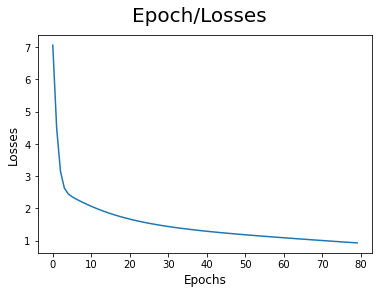

In [59]:
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

Predict function

In [60]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

In [62]:
# (['we', 'are', 'to', 'study'], 'about')
predict(['deep', 'learning', 'machine', 'learning'])

'is'

Accuracy

In [63]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

In [64]:
accuracy()

0.9943502824858758

In [66]:
predict(['machine', 'learning', 'that', 'teaches'])

'technique'